# **A. Các kiến trúc CNN hiện đại** 

## **I. Tiến trình phát triển của CNN**

[SIFT](), [SURF](), [HOG]() là những phương pháp quan trích chọn đặc trưng thủ công, được áp dụng kết hợp với các thuật toán thủ công ML, SVM, MLP, k-NN, Random Forest,...

- Các đặc trưng được tạo ra không có khả năng huấn luyện vì qui luật tạo ra chúng là cố định.
- Pipeline tách rời giữa feature extractors và classifier.

## **II. Các đặc trưng chung của mạng CNN**

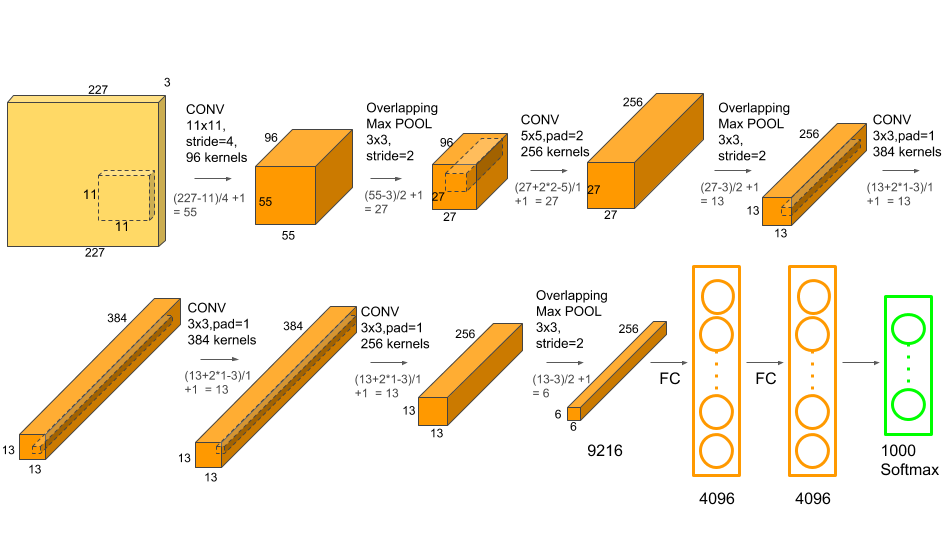

- Sử dụng tích chập:
- Kiến trúc phân tầng: Học được đặc trưng ở những cấp độ khác nhau
- Được huấn luyện trên bộ dữ liệu lớn:
- Độ sâu tầng layers tăng dần: tăng theo cấp số nhân (x2), học được da d dạng các đặc trưng
 

# **LeNet-5 (1998)**

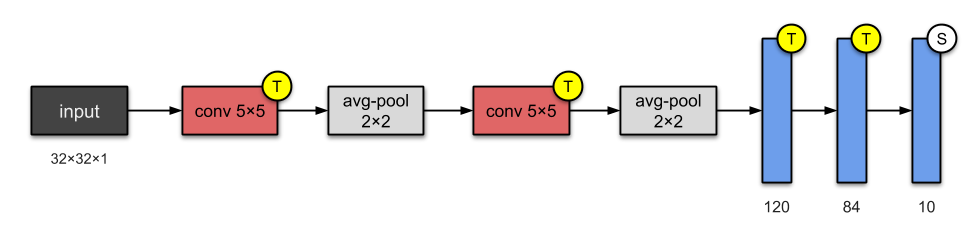

## **1. LeNet-5 Model Introduction**

LeNet-5 là kiến trúc áp dụng mạng tích chập đầu tiên của giáo sư Yan Lecun, cha đẻ của kiến trúc CNN. Model gồm 2 Convolution layers + 3 fully-connected layers, khá đơn giản nhưng có kết quả tốt hơn SVM, kNN.

Model sử dụng Sub-Sampling Layer là một Average-Pooling Layer (Giảm chiều dữ liệu mà không thay đổi đặc trưng). Kiến trúc khó hội tụ và sau nà thay đổi thành Max-Pooling. Input size nhỏ `32 x 32` và ít layers nên số lượng tham số khoảng 60 nghìn.

## **2. Code demo kiến trúc mạng LeNet-5**

### **Pytorch**

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16,120,5)
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(120,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = nn.functional.relu(self.conv3(x))
        x = self.flat(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# **AlexNet (2012)** 

## **1. AlexNet architecture:**

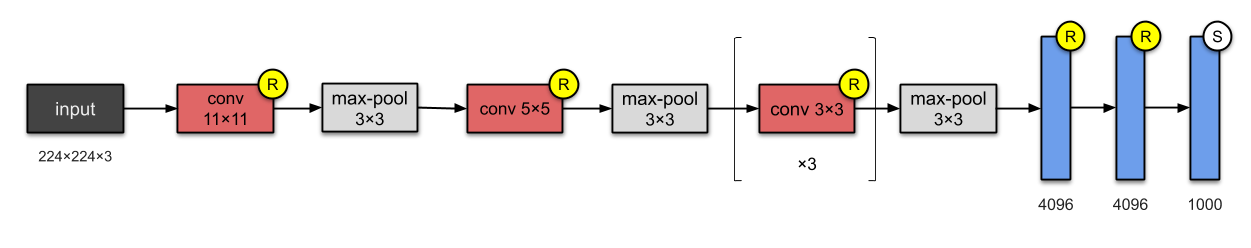

AlexNet được giới thiệu 2012 bởi Alex Krizhevsky và dành chiến thắng trong cuộc thi ImageNet. Lần đầu phá vỡ định kiến trước đó cho rằng đặc trưng được học từ mô hình sẽ không tốt bằng các đặc trưng được tạo thủ công (thông qua các thoạt toán HOG, SUFT, SHIFT). Ý tưởng của AlexNet dựa trên LeNet của Yan Lecun và cải tiến ở các điểm:
- Tăng kích thước đầu vào và độ sâu của mạng.
- Sử dụng các bộ lọc (kernel hoặc filter) với kích thước giảm dần qua các layers để phù hợp với kích thước của đặc trưng chung và đặc trưng riêng. Các Convolution layer đầu tiên có kernel size lớn để trích xuất các đặc trưng mang tính tổng quát, chung, các Conv cuối có kernel size nhỏ học được các đặc trưng riêng, cụ thể hơn. 
- Sử dụng local normalization để chuẩn hóa các layer giúp cho quá trình hội tụ nhanh hơn.

Cải tiến trong quá trình optimizer:
- Activation Function là hàm ReLU (Rectified Linear Unit) thay cho Sigmoid. ReLU function làm tốc độ tính toán nhanh nhờ đạo hàm chỉ có 2 giá trị {0,1} và không có lũy thừa cơ số e, vẫn có tính phi tuyến tính.

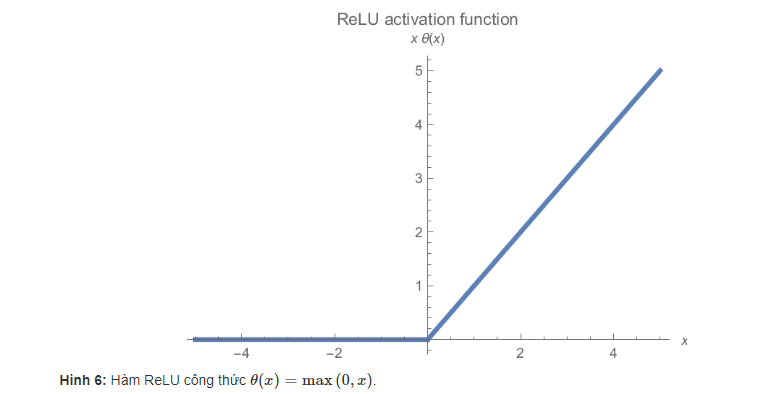

- Sử dụng dropout layer giúp giảm số lượng liên kết neural để kiểm soát Overfiting

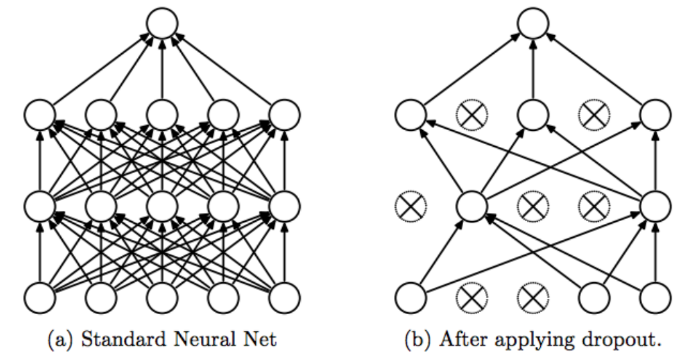

- Qua các layers, kích thước output giảm dần nhưng độ sâu tăng dần qua từng kernel.
Mạng AlexNet có đến 60 triệu tham số, vì Input size lớn, số layers nhiều.

## **2. Code demo kiến trúc mạng AlexNet:**

#### **Tensorflow**

#### **Pytorch**

## **3. References:**

# **VGG Model Architecture**

## **1. VGG-16 architecture (2014):**

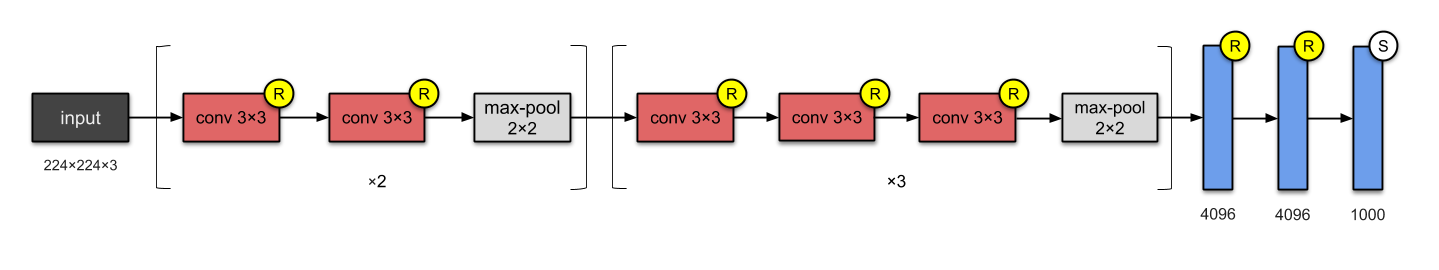

Với quan niệm mạng nơ ron sâu hơn sẽ giúp cải thiện độ chính xác của mô hình tốt hơn VGG-16 ra đời, giữa các đặc điểm chính của AlexNet và cố một số cải tiến: 
- Kiến trúc VGG-16 sâu hơn, bao gồm 13 layers tích chập 2 chiều (thay vì 5 so với AlexNet) và 3 layers fully connected.

- Lần đầu tiên trong VGG-16 chúng ta xuất hiện khái niệm về khối tích chập (block). Đây là những kiến trúc gồm một tập hợp các layers CNN được lặp lại giống nhau. Kiến trúc khối đã khởi nguồn cho một dạng kiến trúc hình mẫu rất thường gặp ở các mạng CNN kể từ đó.

- VGG-16 cũng kế thừa lại hàm activation ReLU ở AlexNet.

- VGG-16 cũng là kiến trúc đầu tiên thay đổi thứ tự của các block khi xếp nhiều layers CNN + max pooling thay vì xen kẽ chỉ một layer CNN + max pooling. 
Sự thay đổi này sẽ giúp cho VGG net cải thiện hơn như thế nào? Các layers CNN sâu hơn có thể trích lọc đặc trưng tốt hơn so với chỉ 1 layers CNN.

- VGG-16 chỉ sử dụng các bộ lọc kích thước nhỏ `3x3` thay vì nhiều kích thước bộ lọc như AlexNet. Kích thước bộ lọc nhỏ sẽ giúp giảm số lượng tham số cho mô hình và mang lại hiệu quả tính toán hơn. VD: Nếu sử dụng 2 bộ lọc kích thước `3 x 3` trên một featurs map (là output của một layer CNN) có độ sâu là 3 thì ta sẽ cần `n_filters x kernel_size x kernel_size x n_channels = 2 x 3 x 3 x 3 = 54` tham số. Nhưng nếu sử dụng 1 bộ lọc kích thước `5 x 5` sẽ cần `5 x 5 x 3 = 75` tham số. 2 bộ lọc `3 x 3` vẫn mang lại hiệu quả hơn so với 1 bộ lọc `5 x 5`

## **2. Code demo kiến trúc mạng VGG-16:**

#### **Tensorflow**

#### **Pytorch**

## **3. Các phiên bản khác của mạng VGG:**


## **4. Refferences:**

# **GoogleNet - Inception-V1 (2014)**

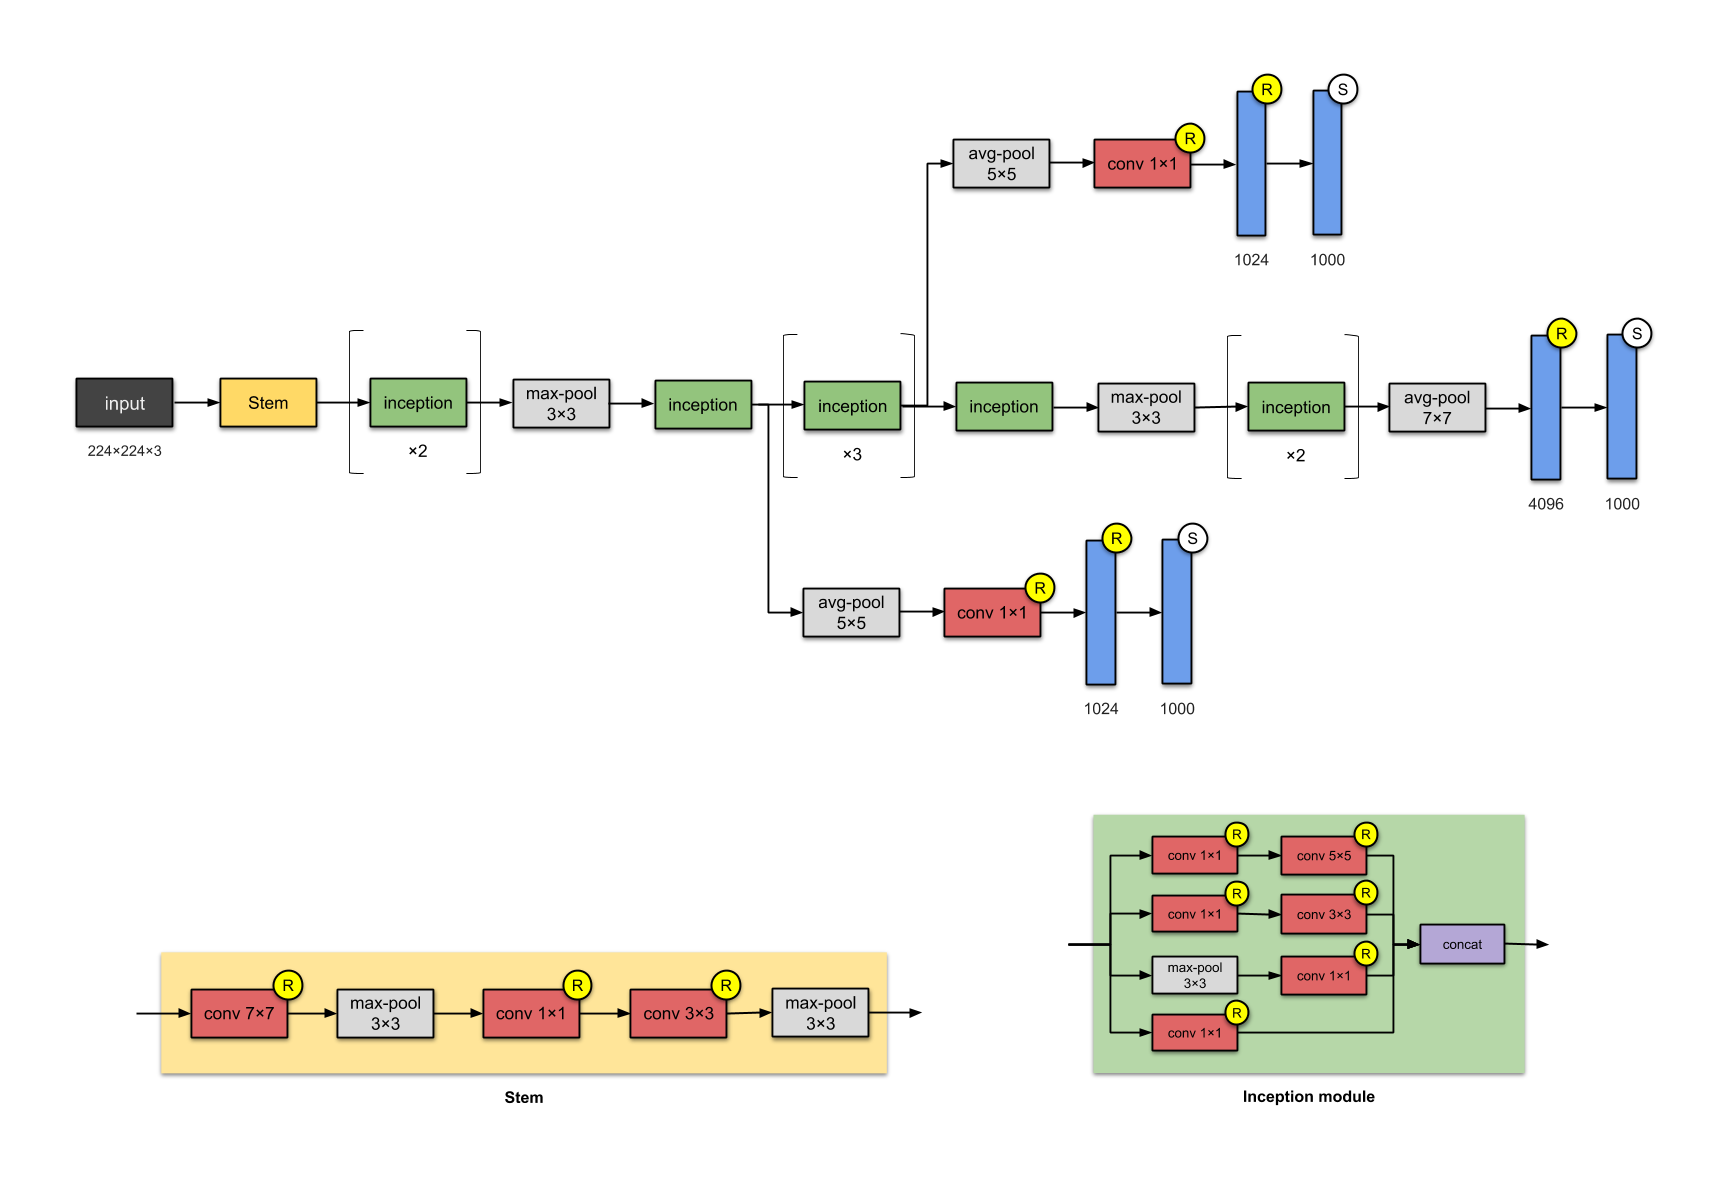

 
Kết hợp đồng thời các bộ lọc với đa dạng kích thước (kernel_size `11x11`, `5x5`, `3x3`, `1x1`) mang lại hiệu quả tốt

**Khối Inception:**
-  Khối Inception sẽ bao gồm 4 nhánh song song. Các bộ lọc kích thước lần lượt là `1x1`, `3x3`, `5x5` được áp dụng trong Inception Module giúp trích lọc được đa dạng đặc trưng trên những vùng nhận thức có kích thước khác nhau.
- Đầu các nhánh 1, 2, 4, phép tích chập 1x1 giảm độ sâu kênh và số lượng tham số của mô hình.
- Nhánh 3, giảm chiều dữ liệu bằng 1 layer max-pooling kích thước `3x3`, áp dụng bộ lọc có kích thước `1x1` để thay đổi số kênh.
- Các nhánh áp dụng padding và stride để output có cùng kích thước chiều dài, chiều rộng. Cuối cùng concate toàn kết quả đầu ra của các khối theo kênh để thu được output có kích bằng input

Khối Inception được lặp lại 7 lần trong kiến trúc Inception-V1. Toàn bộ mạng bao gồm 22 Layers, lớn hơn gần gấp đôi so với VGG-16. Nhờ áp dụng tích chập `1x1` giúp tiết kiệm số lượng tham số xuống chỉ còn 5 triệu, ít hơn gần 27 lần so với VGG-16.

# **GoogleNet-Inception-V3 (2015)**

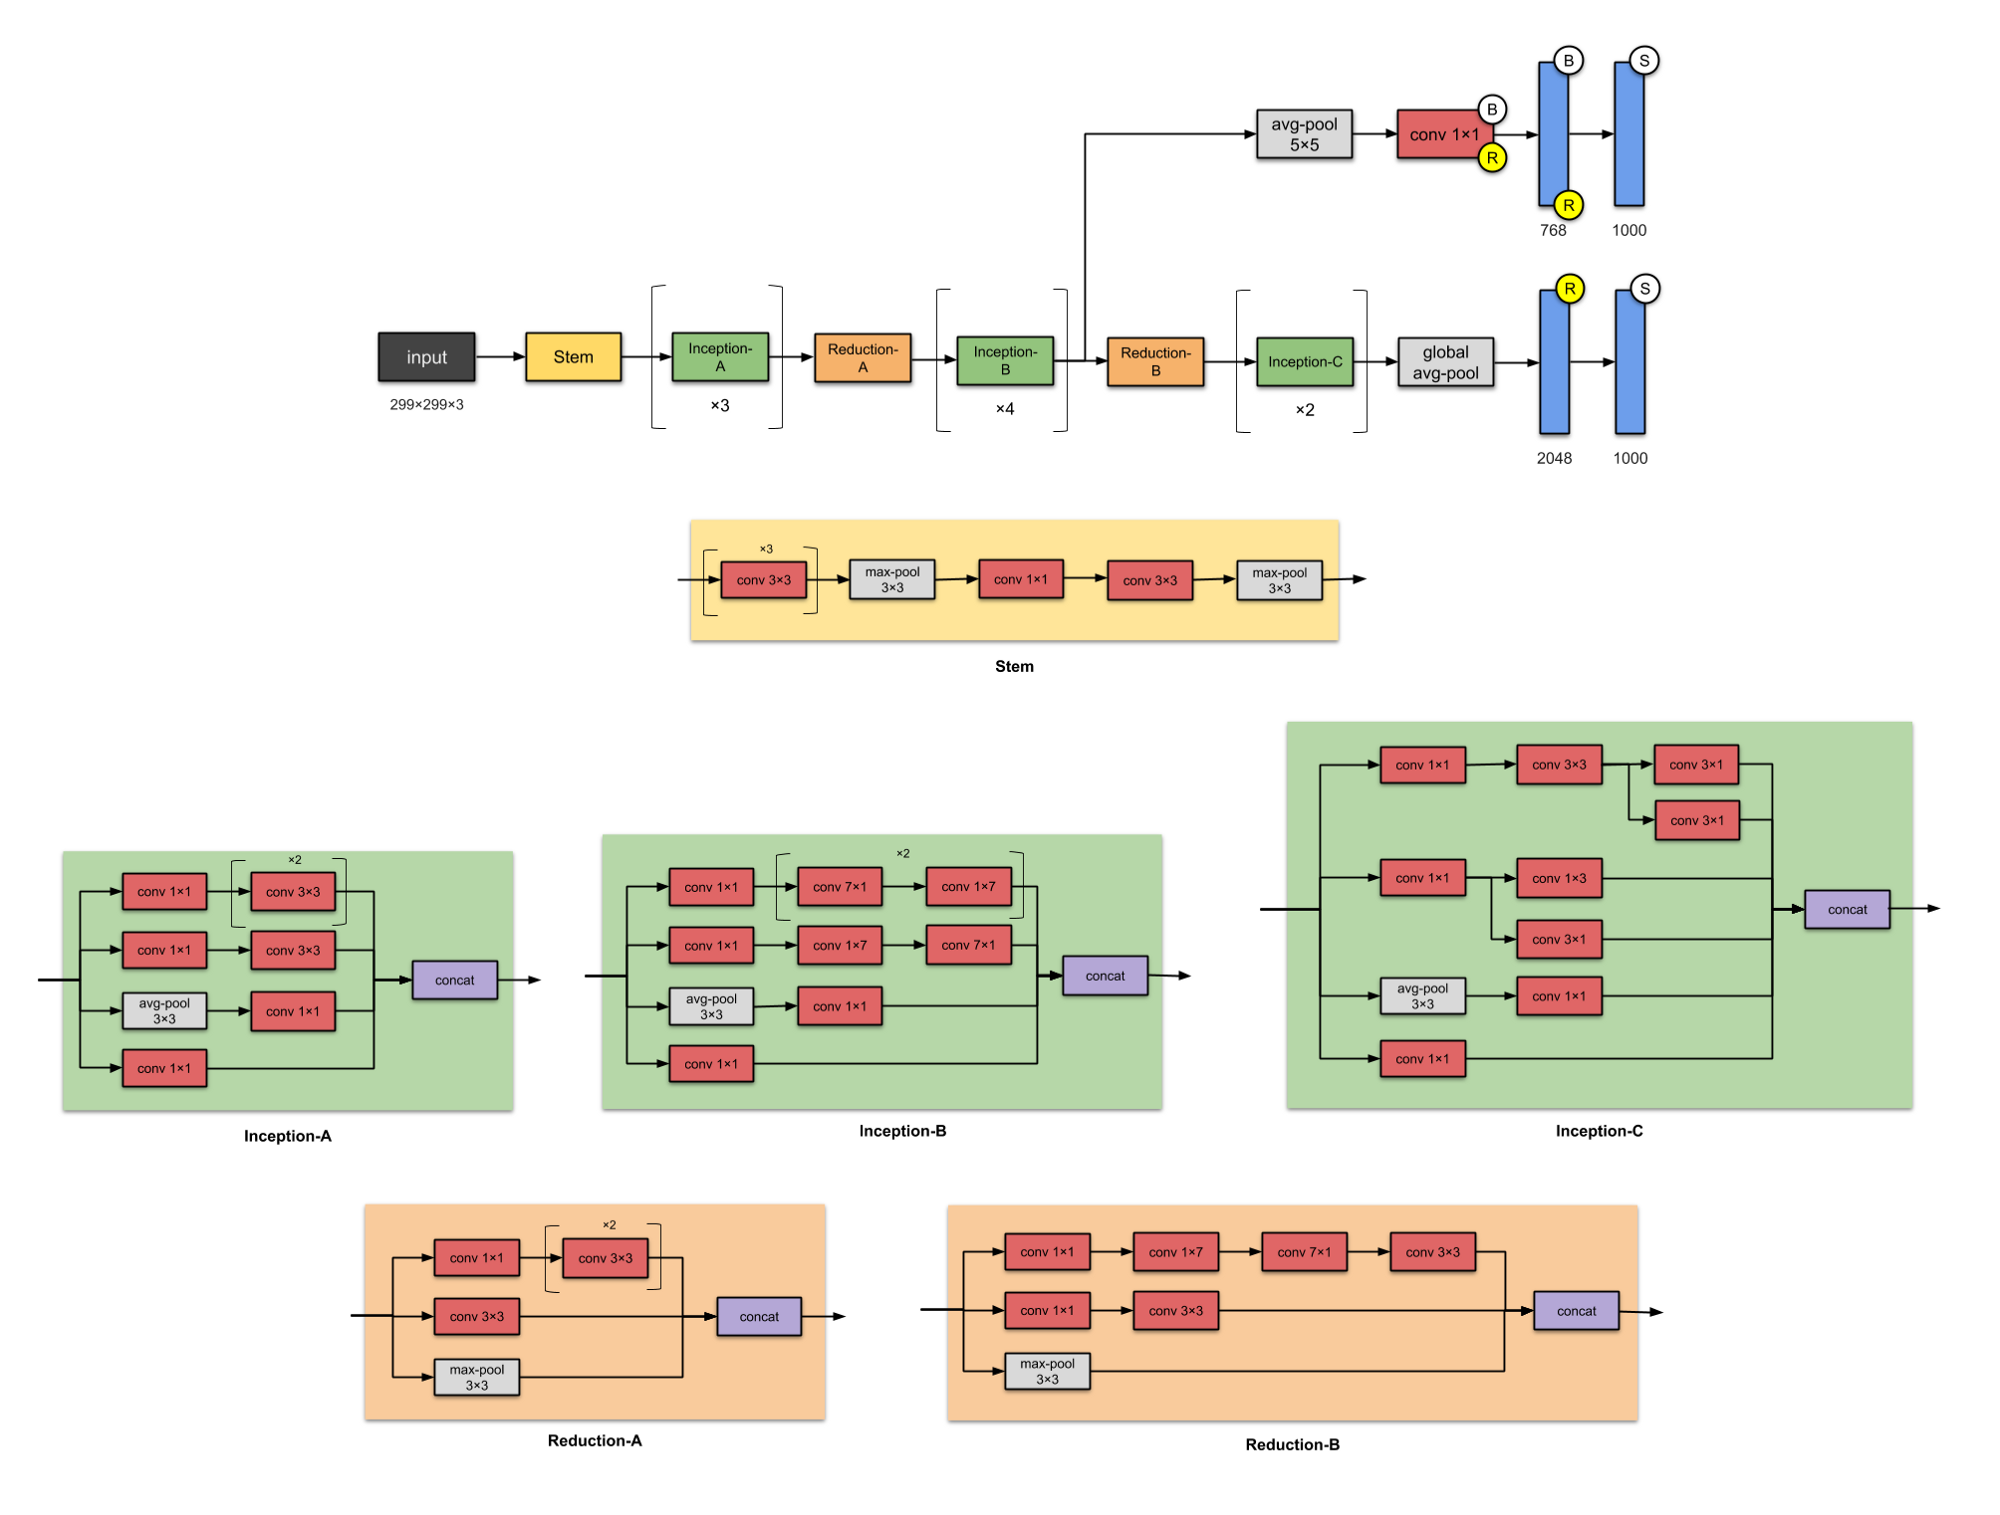

Inception-V3 là kế thừa của Inception-V1 bao gồm 24 triệu tham số. Toàn bộ các layer tích chập của Inception-V3 được theo sau bởi một layer batch normalization và một ReLU activation.

Inception-V3 giải quyết được vấn đề thắt cổ chai (representational bottlenecks). Tức là kích thước của các layers không bị giảm một cách đột ngột. Đồng thời Inception-V3 có một cách tính toán hiệu quả hơn nhờ sử dụng phương pháp nhân tố (factorisation methods).

Hiện tại Inception module bao gồm 4 version:

- Inception-A: Cải tiến so với Inception module V1. Tại nhánh thứ nhất thay 1 layer tích chập `5 x 5` bằng 2 layer tích chập `3 x 3` liên tiếp giúp giảm số lượng tham số từ 25 về 18 và tăng độ sâu cho mô hình.

- Inception-B: Cải tiến so với Inception-A. Thay tích chập `3 x 3` bằng tích chập `7 x 7` ở nhánh thứ nhất và nhánh thứ 2. Đồng thời chúng ta phân tích nhân tố tích chập `7 x 7` thành 2 tích chập liên tiếp `7 x 1` và `1 x 7` số lượng tham số sẽ ít hơn so với tích chập 2 tích chập `3 x 3` liên tiếp. Nhờ đó số lượng tham số giảm từ 18 xuống còn 14.

- Inception-C: Cải tiến so với Inception-B. Thay tích chập `7 x 1` bằng tích chập `3 x 1` và `1 x 7` bằng `1 x 3` và đồng thời thay vì đặt layer `3 x 1` và `1 x 3` liên tiếp thì đặt chúng song song. Kiến trúc này giúp giảm số lượng tham số từ 14 về còn 6.

Ngoài ra ở Inception-V3 chúng ta còn sử dụng 2 kiến trúc giảm chiều dữ liệu là Reduction-A và Reduction-B.

# **ResNet Model Architecture**

## **1. Lịch sử ResNet:**


ResNet là một mạng CNN nổi bật lần đầu tiên được công bố năm 2015 với paper [Deep Resual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf) và rất nhanh đạt top  trong cuộc thi ILSVRC 2015. Hiện tại có nhiều phiên bản khác nhau ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-152,...Với tên là ResNet theo sau là một số chỉ kiến trúc ResNet với số lớp nhất định.

#### **Tại sao lại xuất hiện ResNet?**
Để giải quyết hiện tượng `Vanishing Gradient`

##### **Vanishing Gradient**
Trước hết thì Backpropagation Algorithm là một kỹ thuật thường được sử dụng trong quá trình tranining. Ý tưởng chung của thuật toán lá sẽ đi từ output layer đến input layer và tính toán gradient của cost function tương ứng cho từng parameter (weight) của mạng. Gradient Descent sau đó được sử dụng để cập nhật các parameter đó.

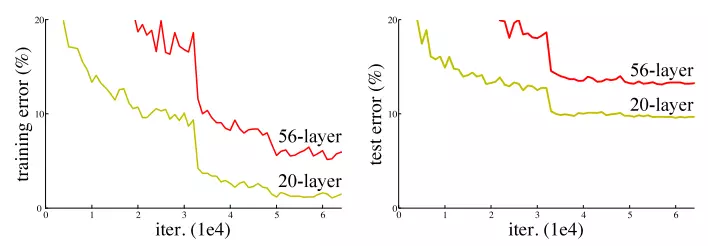

Toàn bộ quá trình trên sẽ được lặp đi lặp lại cho tới khi mà các parameter của network được hội tụ. Thông thường chúng ta sẽ có một hyperparameter (số Epoch) định nghĩa cho số lượng vòng lặp để thực hiện quá trình này. Nếu số lượng vòng lặp quá nhỏ thì ta gặp phải trường hợp mạng có thể sẽ không cho ra kết quả tốt và ngược lại thời gian tranining sẽ lâu nếu số lượng vòng lặp quá lớn.

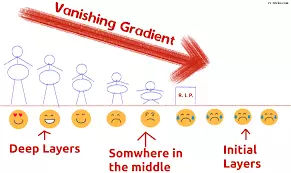

Tuy nhiên, trong thực tế Gradients thường sẽ có giá trị nhỏ dần khi đi xuống các layer thấp hơn. Dẫn đến kết quả là các cập nhật thực hiện bởi Gradients Descent không làm thay đổi nhiều weights của các layer đó và làm chúng không thể hội tụ và mạng sẽ không thu được kết quả tốt. Hiện tượng như vậy gọi là `Vanishing Gradients`.

**Để cải thiện Accuracy không chỉ đơn giản xây dựng Deep Learning model càng sâu càng tốt**

Điểm đặc biệt nhất trong ResNet là `skip connection` (kết nối tắt) được áp dụng bên trong mỗi khối. Với mục đích lưu giữ những thông tin của lớp hay khối trước để huấn luyện cho hiện tại và tương lai. ResNet là viết tắt `Residual Learning Network.`

## **2. Kiến trúc mạng ResNet**

### **2.1 Batch normalization:**

ResNet là một trong những kiến trúc đầu tiên áp dụng Batch Normalization bên trong Residual block. Batch Norm giúp Gradient Descent ổn định và quá trình hội tụ nhanh hơn.

Batch Normalization được áp dụng trên mỗi mini-batch bởi Standard Normalization $\mathbf{N}(0, 1)$. For example, we have $\mathcal{B} =\{ x_1, x_2, \dots, x_m \}$, m là mini-batch size. 

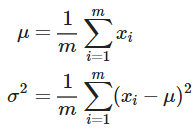

mẫu mới đã được chuẩn hóa:

$$\hat{x}_i = \frac{x_i-\mu}{\sigma}$$

Để tổn quát hơn ta dùng mini-batch size lớn hơn như 128, 256

### **2.2 Skip connection (kết nối tắt):**

Giải pháp sử dụng để tránh Vanishing Gradient là sử dụng Skip connection. Residual Block tương tự như những block mạng Vgg, ngoại trừ identify layer công trực tiếp input x của khối đầu vào trước đó vơi đầu ra để tạo thành Input của khối đầu vào tiếp ra.

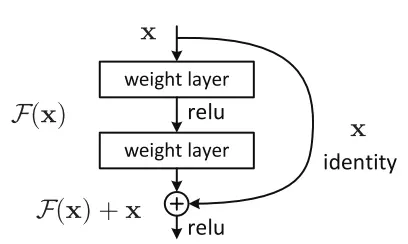

Giả sử rằng ouput của shallow learned layer là $\mathbf{x}$, quá trình feed forward biến đổi qua hàm không tuyến tính $\mathcal{F}(\mathbf{x})$. Và ta thực giả định output toàn bộ quá trình đó là $\mathcal{H}(\mathbf{x})$. Nên ta có:

$$\mathcal{F}(\mathbf{x}; \{{W_i}\}) := \mathcal{H}(\mathbf{x}) - \mathbf{x}$$

$\{{W_i}\}$ là ma trận tham số của mô hình trong nhiều lớp tích chập của phép biến bổi $\mathcal{F}$ và được học trong quá trình Backpropagation.

Skip connections đơn giản là việc thực hiện identity mapping, những output của chúng được cộng vào của các lớp chồng lên nhau. Ta gọi nó là identity block.

Những block khác chúng ta áp dụng biến đổi tích chập trước khi nối tắt từ input layers đến output layers để học được các đặc trưng.

$$\mathbf{y} = \mathcal{F}(\mathbf{x}; \{{W_i}\}) + \text{Conv}(\mathbf{x})$$

Để cho hình dạng output không thay đổi và giảm số lượng tham số, các lớp $\text{Conv}$ có kernel size `1 x 1`

**Residual Block**

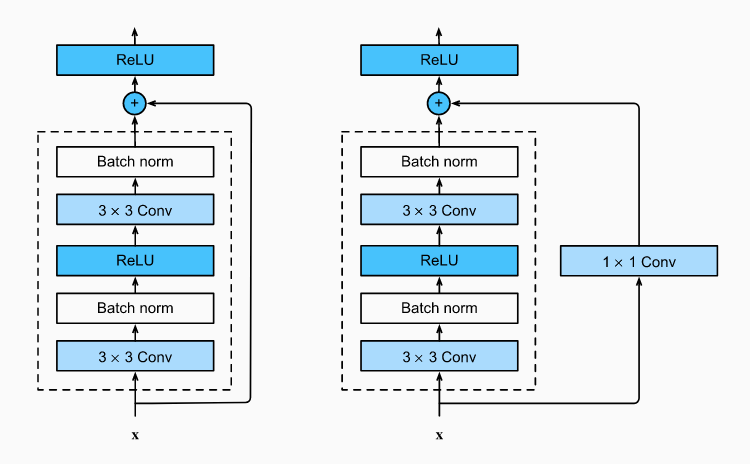

**Bottleneck Residual Block**

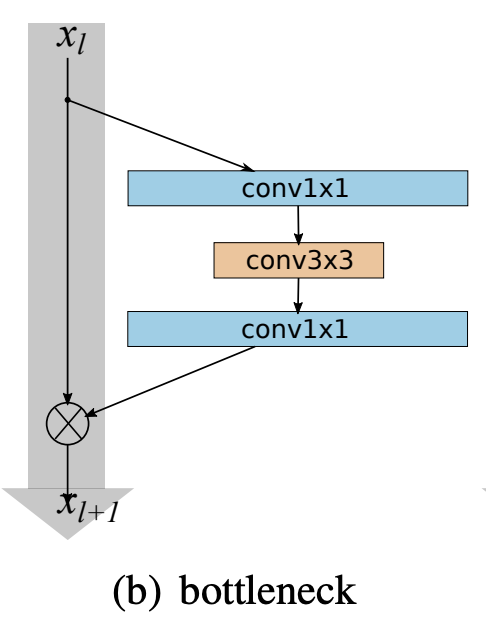

Bottleneck Residual Block là một biến thể của Residual block sử dụng Conv layer `1 x 1` để tạo ra `nút thắt cổ chai` với mục đích làm giảm số lượng tham số trong mô hình và phép nhân ma trận. Ý tưởng làm cho residual blocks mỏng nhất co thể tức là tăng chiều sâu và ít parameters. Nó được sử dụng trong ResNet50, ResNet101...

## **3. Build up Residual Block:**

#### **Tensorflow**

In [12]:
import tensorflow as tf

class ResidualBlockTF(tf.keras.layers.Layer):
    def __init__(self, num_channels, output_channels, strides=1, is_used_conv11=False, **kwargs ):
        super(ResidualBlockTF, self).__init__(**kwargs)
        self.is_used_conv11 = is_used_conv11
        self.conv1 = tf.keras.layers.Conv2D(num_channels, padding='same',
                                            kernel_size=3, strides=1)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(num_channels, padding='same', 
                                            kernel_size=3, strides=1)
        
        if self.is_used_conv11:
            self.conv3 = tf.keras.layers.Conv2D(num_channels, padding='same', 
                                                kernel_size=1, strides=1)
        # Last convolutional layer to reduce output block shape.
        self.conv4 = tf.keras.layers.Conv2D(output_channels, padding='same',
                                            kernel_size=1, strides=strides)

        self.relu = tf.keras.layers.ReLU()

    def call(self, X):
        if self.is_used_conv11:
            Y = self.conv3(X)
        else:
            Y = X

        X = self.conv1(X)
        X = self.relu(X)
        X = self.batch_norm(X)
        X = self.relu(X)
        X = self.conv2(X)
        X = self.batch_norm(X)
        X = self.relu(X+Y)
        X = self.conv4(X)

        return X

In [4]:
X = tf.random.uniform((4, 28, 28, 1)) # shape=(batch_size, width, height, channels)
X = ResidualBlockTF(num_channels=1, output_channels=64, strides=2, is_used_conv11=True)(X)
print(X.shape)

(4, 14, 14, 64)


#### **Pytorch**

In [2]:
import torch 
from torch import nn

class ResidualBlockPytorch(nn.Module):
    def __init__(self, num_channels, output_channels, strides=1, is_used_conv11=False, **kwargs):
        super(ResidualBlockPytorch, self).__init__(**kwargs)
        self.is_used_conv11 = is_used_conv11
        self.conv1 = nn.Conv2d(in_channels= num_channels, out_channels= num_channels, padding = 1, 
                                kernel_size=3, stride=1)
        self.batch_norm = nn.BatchNorm2d(num_channels)
        self.conv2 = nn.Conv2d(num_channels, num_channels, padding=1, 
                                kernel_size=3, stride=1)

        if self.is_used_conv11:
            self.conv3 = nn.Conv2d(num_channels, num_channels, padding=0, 
                           kernel_size=1, stride=1)
        # Last convolutional layer to reduce output block shape.
        self.conv4 = nn.Conv2d(num_channels, output_channels, padding=0, 
                           kernel_size=1, stride=strides)
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, X):
        if self.is_used_conv11:
            Y = self.conv3(X)
        else:
            Y = X
        X = self.conv1(X)
        X = self.relu(X)
        X = self.batch_norm(X)
        X = self.relu(X)
        X = self.conv2(X)
        X = self.batch_norm(X)
        X = self.relu(X+Y)
        X = self.conv4(X)
        return X

In [9]:
X = torch.rand((4, 1, 28, 28)) # shape=(batch_size, channels, width, height)
X = ResidualBlockPytorch(num_channels=1, output_channels=64, strides=1, is_used_conv11=True)(X)
print(X.shape)

torch.Size([4, 64, 28, 28])


## **4. ResNet Model** 

Có nhiều phiên bản ResNet với độ sâu khác nhau ResNet18, ResNet34, ResNet50, ResNet101, ResNet152.

### **4.1 Kiến trúc mạng ResNet:**

![](https://imgur.com/TBnUbVO.png)
**ResNet-18 architecture.**

Bắt đầu Conv2D size `7 x 7`, kernel size lớn bởi input size lớn giúp nắm bắt đặc trưng một cách tổng quát hơn. Và cứ sau mỗi Conv Layer sẽ có Batch Normalization layer.

Residual Block là khối hình chữ nhật dược bao bọc bởi đường đường nét đứt chứa 5 layers xếp chồng lên nhau như trong hình. 2 block đầu tiên là residual block chính là identify blocks. Theo sau đó lặp lại 3 lần `[convolutional mapping + identity mapping]`. Cuối cùng, có lớp global pooling để capture các features chung theo chiều sâu truyền tới Fully Connected ouput.



### **4.2 Luyện tập Coding**

#### **Tensorflow**

In [13]:
import tensorflow as tf

class ResNet18TF(tf.keras.Model):
    def __init__(self, residual_blocks, output_shape):
        super(ResNet18TF, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=2 ,padding='same')
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.max_pool = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same')
        self.relu = tf.keras.layers.ReLU()
        self.residual_blocks = residual_blocks
        self.global_avg_pool = tf.keras.layers.GlobalAvgPool2D()
        self.dense = tf.keras.layers.Dense(units=output_shape)
    
    def call(self, X):
        X = self.conv1(X)
        X = self.batch_norm(X)
        X = self.relu(X)
        X = self.max_pool(X)
        for residual_block in residual_blocks:
            X = residual_block(X)
        X = self.global_avg_pool(X)
        X = self.dense(X)
        return X

residual_blocks = [
    # Two start conv mapping
    ResidualBlockTF(num_channels=64, output_channels=64, strides=2, is_used_conv11=False),
    ResidualBlockTF(num_channels=64, output_channels=64, strides=2, is_used_conv11=False),
    # Next three [conv mapping + identity mapping]
    ResidualBlockTF(num_channels=64, output_channels=128, strides=2, is_used_conv11=True),
    ResidualBlockTF(num_channels=128, output_channels=128, strides=2, is_used_conv11=False),
    ResidualBlockTF(num_channels=128, output_channels=256, strides=2, is_used_conv11=True),
    ResidualBlockTF(num_channels=256, output_channels=256, strides=2, is_used_conv11=False),
    ResidualBlockTF(num_channels=256, output_channels=512, strides=2, is_used_conv11=True),
    ResidualBlockTF(num_channels=512, output_channels=512, strides=2, is_used_conv11=False)
]


In [4]:
tfmodel = ResNet18TF(residual_blocks, output_shape=10)
tfmodel.build(input_shape=(None, 28, 28, 1))
tfmodel.summary()

Model: "res_net18tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          multiple                  3200      
                                                                 
 batch_normalization_8 (Batc  multiple                 256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 re_lu_8 (ReLU)              multiple                  0         
                                                                 
 residual_block_tf (Residual  multiple                 78272     
 BlockTF)                                                        
                                                       

#### **Pytorch**

In [6]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch
from torch import nn
from torchsummary import summary

class ResNet18PyTorch(nn.Module):
  def __init__(self, residual_blocks, output_shape):
    super(ResNet18PyTorch, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=7, stride=2, padding=3)
    self.batch_norm = nn.BatchNorm2d(64)
    self.max_pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    self.relu = nn.ReLU()
    self.residual_blocks = nn.Sequential(*residual_blocks)
    self.global_avg_pool = nn.Flatten()
    self.dense = nn.Linear(in_features=512, out_features=output_shape)

  def forward(self, X):
    X = self.conv1(X)
    X = self.batch_norm(X)
    X = self.relu(X)
    X = self.max_pool(X)
    X = self.residual_blocks(X)
    X = self.global_avg_pool(X)
    X = self.dense(X)
    return X

residual_blocks = [
    # Two start conv mapping
    ResidualBlockPytorch(num_channels=64, output_channels=64, strides=2, is_used_conv11=False),
    ResidualBlockPytorch(num_channels=64, output_channels=64, strides=2, is_used_conv11=False),
    # Next three [conv mapping + identity mapping]
    ResidualBlockPytorch(num_channels=64, output_channels=128, strides=2, is_used_conv11=True),
    ResidualBlockPytorch(num_channels=128, output_channels=128, strides=2, is_used_conv11=False),
    ResidualBlockPytorch(num_channels=128, output_channels=256, strides=2, is_used_conv11=True),
    ResidualBlockPytorch(num_channels=256, output_channels=256, strides=2, is_used_conv11=False),
    ResidualBlockPytorch(num_channels=256, output_channels=512, strides=2, is_used_conv11=True),
    ResidualBlockPytorch(num_channels=512, output_channels=512, strides=2, is_used_conv11=False)
]

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ptmodel = ResNet18PyTorch(residual_blocks, output_shape=10)
ptmodel.to(device)
summary(ptmodel, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           3,200
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,928
              ReLU-6             [-1, 64, 7, 7]               0
       BatchNorm2d-7             [-1, 64, 7, 7]             128
              ReLU-8             [-1, 64, 7, 7]               0
            Conv2d-9             [-1, 64, 7, 7]          36,928
      BatchNorm2d-10             [-1, 64, 7, 7]             128
             ReLU-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 4, 4]           4,160
ResidualBlockPytorch-13             [-1, 64, 4, 4]               0
           Conv2d-14             [-1

## **5. Train Model**

#### **Tensorflow**

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))
# Convert data type bo be adaptable to tensorflow computation engine
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
print(X_test.shape, X_train.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [15]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.99)
tfmodel.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tfmodel.fit(X_train, y_train,
            validation_data = (X_test, y_test), 
            batch_size=32,
            epochs=1)

1875/1875 [==============================] - 820s 435ms/step - loss: 1.8975 - accuracy: 0.3432 - val_loss: 2.3798 - val_accuracy: 0.2217


#### **Pytorch**

In [16]:
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.05), (0.05))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=8)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ptmodel.parameters(), lr=0.01, betas=(0.9, 0.99))

                        
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (torch.argmax(output, axis=1)==label).float().mean()

for epoch in range(1):  # loop over the dataset multiple times
    total_loss = 0.0
    tic = time.time()
    tic_step = time.time()
    train_acc = 0.0
    valid_acc = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = ptmodel(inputs)
        train_acc += acc(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
        if i % 500 == 499:
          print("iter %d: loss %.3f, train acc %.3f in %.1f sec" % (
            i+1, total_loss/i, train_acc/i, time.time()-tic_step))
          tic_step = time.time()

    # calculate validation accuracy
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        valid_acc += acc(ptmodel(inputs), labels)

    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            epoch, total_loss/len(trainloader), train_acc/len(trainloader),
            valid_acc/len(testloader), time.time()-tic))

print('Finished Training')

iter 500: loss 2.090, train acc 0.278 in 274.2 sec
iter 1000: loss 2.201, train acc 0.189 in 200.4 sec
iter 1500: loss 2.237, train acc 0.160 in 234.8 sec
Epoch 0: loss 2.251, train acc 0.148, test acc 0.098, in 905.3 sec
Finished Training


## **6. Tham khảo:**
1. [ResNet Model](https://phamdinhkhanh.github.io/2020/12/19/Resnet.html)

# **Xception Model** 

### **I. Overview:**

Xception là một kiến trúc CNN có thể phân tách theo chiều sâu (Depthwise Separable Convolutions). Một tích chập có thể phân tách theo chiều sâu có thể được hiểu là mô-đun Inception với số lượng tháp cực lớn. Kiến ​​trúc mạng thần kinh tích chập sâu mới lấy cảm hứng từ Inception, trong đó các mô-đun Inception đã được thay thế bằng các cấu trúc tích chập có thể phân tách theo chiều sâu. 

### **II. Xception network**

**1. Hình dạng Model:**

Đầu tiên dữ liệu sẽ qua entry flow, tiếp theo qua Middle flow 8 lần, cuối cùng đi qua exit flow. Chú ý tất cả lớp Convolution và lớp SeparableConvolution được chuẩn hóa Batch Normalization.

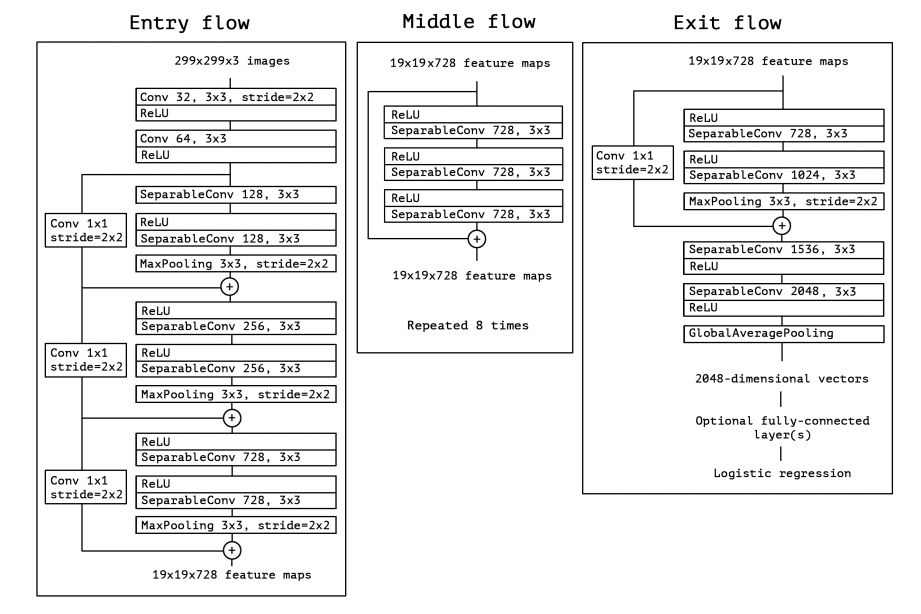

Xception mode vượt trội so với VGG-16, Inception-V3

**2. Hoạt động Xception Model:**

Có 2 đặc điểm chính:
- Tích chập có thể phân tách theo chiều sâu (Depthwise Separable Convolution)
- Các kết nối tắt giữa các Convolution như trong ResNet

**Depthwise Separable Convolution** 
Các phép chập có thể phân tách theo chiều sâu là các lựa chọn thay thế cho các phép chập cổ điển được cho là hiệu quả hơn nhiều về thời gian tính toán.

**Hạn chế của Convolution cổ điển:** Chi phí tính toán tốn kém 

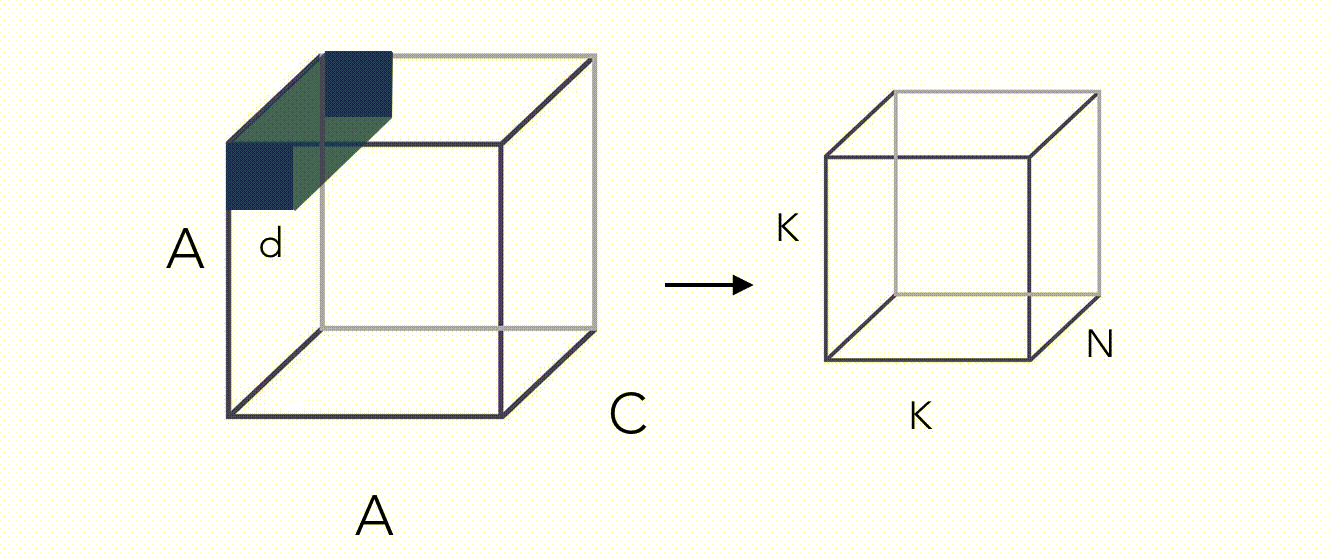

Với 1 kernel sẽ có: $${K^2 × d^2 × C}$$ phép tính

Do đó với N kernels (độ sâu convolution) số phép tính là: $${K^2 × d^2 × C × N}$$ 

Chi phí tính toán rất lớn, từ đó Depthwise Saparable Convolution ra đời. Được chia thành 2 bước chính:
- Depthwise Convolution
- Pointwise Convolution 

**<p>The Depthwise Convolution</p>**
Thay vì áp dụng convolution size $d × d × C$, chúng ta áp dụng convolution size $d × d × 1$. Tức là chúng ta không tính tích chập cho toàn bộ channels mà chỉ tính từng channels 1.

In [1]:
from IPython.display import Image
Image(url='https://maelfabien.github.io/assets/images/XCeption.gif') 

Kích thước đầu tiên được tạo ra sẽ là $K × K × C$, thay vì $K × K × N$ như trước. Chúng ta chỉ mới thực hiện tích chập trên 1 kernel chứ chưa phải cho N kernels. Bước tiếp theo.

**<p>Pointwise Convolution</p>**

Pointwise convolution được thực hiện giống cách cổ điển, với kích thước $1 × 1 × N$. Điều đó cho phép khối có kích thước $K × K × N$

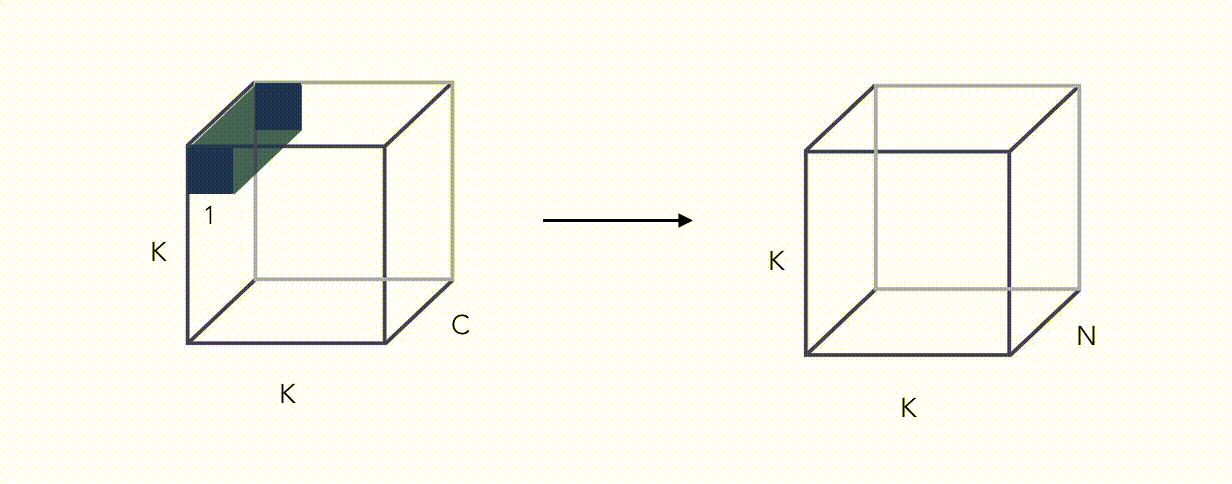

Số phép tính giảm đi N lần

**Thực hiện Xception**

<p>XCeption cung cấp một kiến ​​trúc được tạo thành từ các khối Convolution có thể tách rời theo chiều sâu + Maxpooling, tất cả được liên kết với các kết nối tắt như trong triển khai ResNet. </p>
<p>Điểm đặc biệt của XCeption là Tích chập theo chiều sâu không được theo sau bởi Tích chập theo điểm, nhưng thứ tự bị đảo ngược</p>

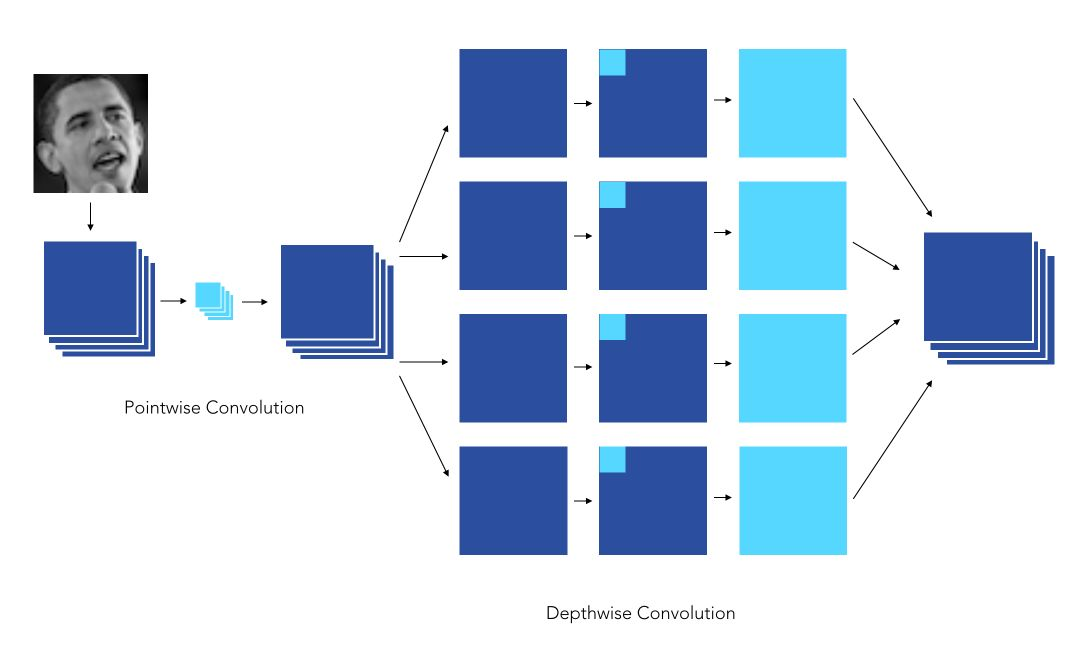

### **III. Thực hành**

In [42]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

### **Data Prepareration** 

In [43]:
import numpy as np
import torch 
from PIL import Image
from torch.utils.data import Dataset
import os

In [44]:
train_path = "data\\cifar10\\train"
test_path = "data\\cifar10\\test"

In [45]:
import os
import pandas as pd
from torchvision.io import read_image
import cv2

class cifar10(Dataset):
    def __init__(self, path):
        super().__init__()
        self.path = path

        self.dict_label = {'airplane':0, 'automobile':1,'bird':2,
                            'cat':3,'deer':4,'dog':5,'frog':6,
                            'horse':7,'ship':8,'truck':9}
        self.imgs, self.labels = self.readImg()

    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        img = self.imgs[index]
        img = torch.from_numpy(img)
        label = self.labels[index]
        label = self.dict_label[label]
        label = torch.tensor(label).type(torch.long)
        return (img, label)

    def readImg(self):
        labels = os.listdir(self.path)
        list_labels = []
        list_imgs = []
        for label in labels:
            imgs_path = os.path.join(self.path, label)
            for img in os.listdir(imgs_path):
                img_path = os.path.join(imgs_path, img)
                list_imgs.append(cv2.resize(cv2.imread(img_path), (32,32)))
                list_labels.append(label)
        return list_imgs, list_labels
    

In [22]:
cd ..

c:\Users\Chi Khang\Documents\Internship


In [47]:
cifar10_dataset = cifar10(train_path)
test_dataset = cifar10(test_path)

In [48]:
from torch.utils.data import DataLoader
trainloader = DataLoader(cifar10_dataset, batch_size=8, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [49]:
train_features, train_labels = next(iter(trainloader))

In [50]:
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([8, 32, 32, 3])
Labels batch shape: torch.Size([8])


In [52]:
X_train, y_train = cifar10_dataset.imgs, cifar10_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

### **Model Design**

In [6]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

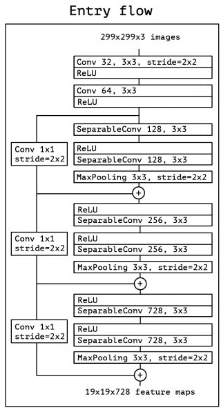

In [1]:
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [128, 256, 728] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x


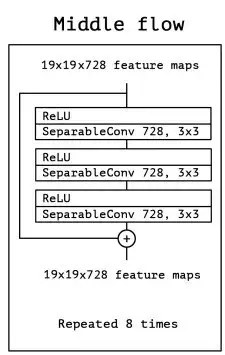

In [2]:
import tensorflow

In [3]:
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

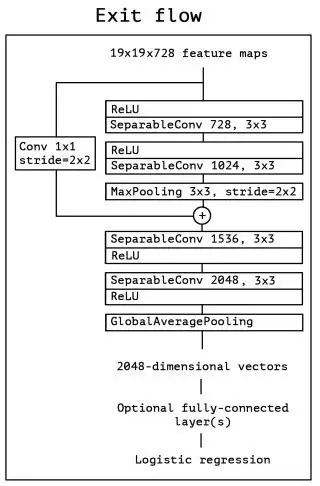

In [4]:
def exit_flow(x) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='linear')(x)
    
    return x

In [7]:
inputs = Input(shape=(32, 32, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

In [8]:
plot_model(xception, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


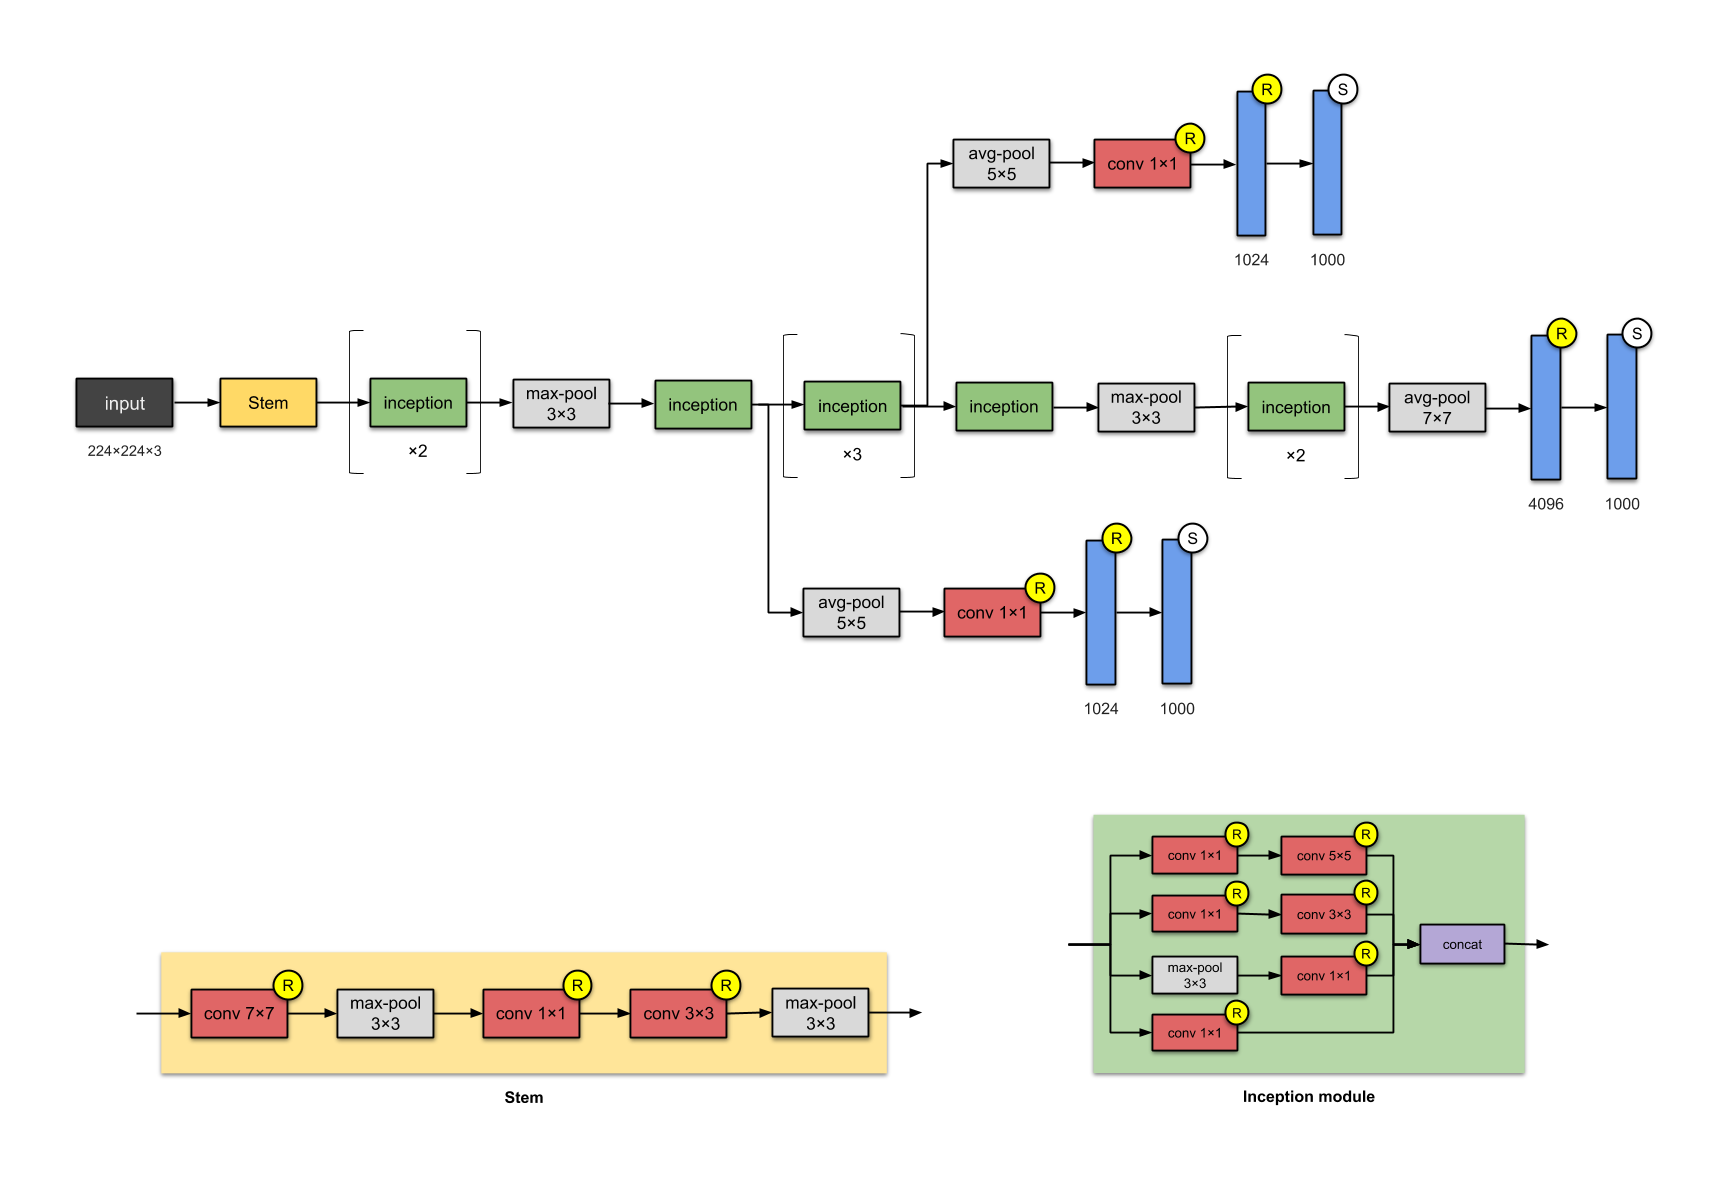

**Hình 1:** Kiến trúc GoogleNet - Inception version 1

Origin paper: https://openaccess.thecvf.com/content_cvpr_2017/papers/Chollet_Xception_Deep_Learning_CVPR_2017_paper.pdf

# **DenseNet (2016)**

Ở ResNet chúng ta tách hàm số thành một hàm xác định và một hàm phi tuyến:
$$f(x) = x + g(x)$$

Công thức triển khai Taylor tại x = 0

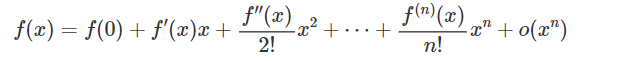

Công thức của ResNet gần tương tự như khai triển Taylor tại đạo hàm bậc nhất, $g(x)$ tương ứng với thành phần số dư. Triển khai taylor sẽ àng chính xác nếu chúng ta phân rã được số dư thành nhiều đạo hàm bậc cao hơn.

Ý tưởng của DenseNet cũng như vậy, chúng ta sẽ sử dụng một mạng lưới các kết nối tắt dày đặc để liên kết các khối với nhau.

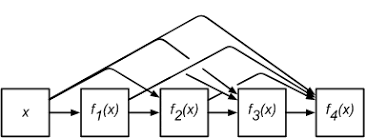

Từ đầu vào x ta sẽ áp dụng liên tiếp chuỗi các ánh xạ liên tiếp với các cấp độ tăng dần

 

DenseNet sẽ khác so với ResNet đó là chúng ta không cộng trực tiếp vào mà thay vào đó, các đầu ra của từng phép ánh xạ có cùng kích thước dài và rộng sẽ được concatenate với nhau thành một khối theo chiều sâu. Sau đó để giảm chiều dữ liệu chúng ta áp dụng tầng chuyển tiếp (translation layer). Tầng này là kết hợp của một layer tích chập giúp giảm độ sâu và một max pooling giúp giảm kích thước dài và rộng

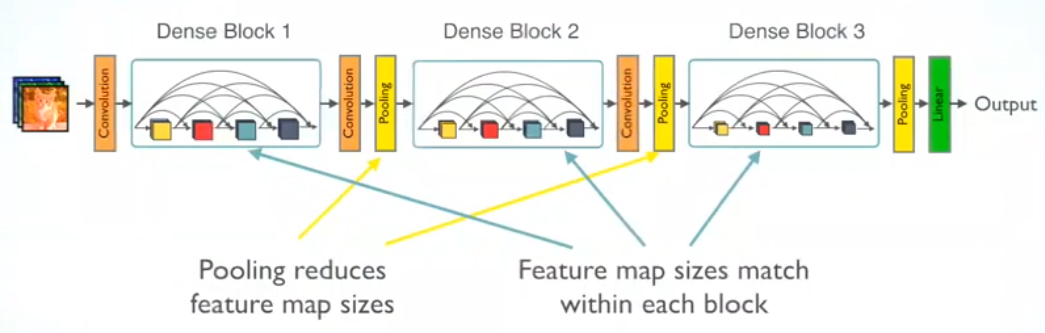

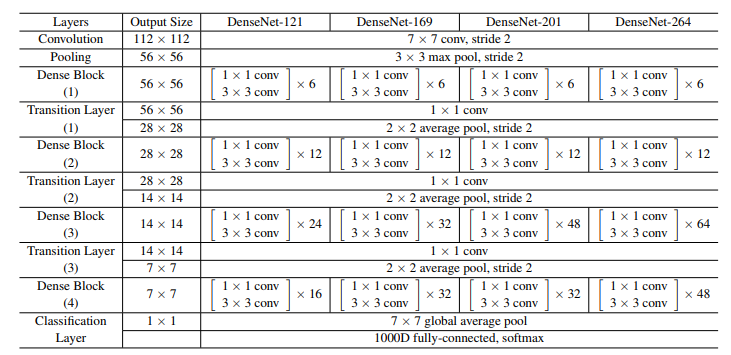

DenseNet121 có 8 triệu tham số, có accuracy cao hơn  ResNet50 vơi gàn 26 triệu tham số trên bộ ImageNet.

DenseNet đồng thời cũng áp dụng BatchNorm trước khi thực hiện tích chập ở các tầng chuyể tiếp để giảm `Vanishing Gradient` 

# **MobileNet**

## **1. Các dạng tích chập:**

### **1.1 Tích chập 2 chiều thông dụng:**

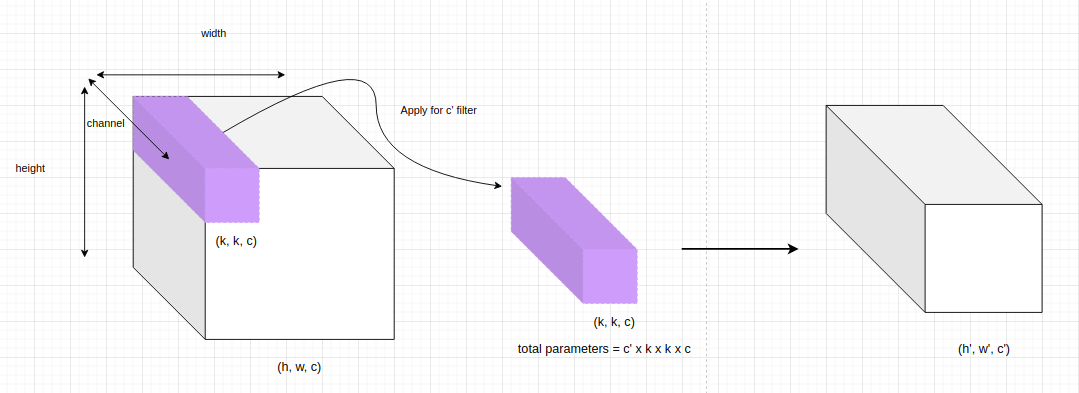

Số lượng tham số cần sử dụng cho một tích chập thông thường sẽ là: $c'×k×k×c$.

Mô hình thuộc họ MobileNet chỉ có vài triệu tham số nhưng độ chính xác tốt hơn AlexNet vài chục triệu tham số. MobileNet lần đầu tiên áp dụng kiến trúc tích chập tách biệt chiều sâu. 

### **1.2 Tích chập tách biệt chiều sâu (Depthwise Separable Convolution).**

**Tài liệu tham khảo:**
- [XCeption Model and Depthwise Separable Convolutions](https://maelfabien.github.io/deeplearning/xception/#)
- [Các kiến trúc CNN hiện đại - Phamdinhkhanh](https://phamdinhkhanh.github.io/2020/05/31/CNNHistory.html) 
- [MobileNet Model - Phamdinhkhanh](https://phamdinhkhanh.github.io/2020/09/19/MobileNet.html)

**Câu hỏi:**
- Xception là gì?
- Vì sao phải phân tách theo chiều sâu?